In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

In [3]:
# Importing Dataset
raw_data = pd.read_csv('bank-full.csv', delimiter=';')
raw_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## 2. Data Exploration <a class="anchor" id="2"></a>

#### A Binary Classification Task as our classes to predict is 'Yes' or 'No' a Binomial Distribution

In [4]:
# print shape of dataset with rows and columns
print(raw_data.shape)
# print top 5 records
raw_data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Descriptive Statistics

In [5]:
raw_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### 2.1 Missing Values <a class="anchor" id="2.1"></a>

In [7]:
raw_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

So we see that there are no missing values.

### Duplicated Values

#### print the duplicated rows

In [8]:
raw_data[raw_data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [9]:
raw_data[raw_data.duplicated()].shape

(0, 17)

### Numerical Variables

In [10]:
# List of Numerical Variables
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
raw_data[numerical_features].head()

Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


#### Discrete Feature
+ Numerical variables are usually of 2 types 
+ Continuous variable and discrete variable

In [11]:
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25 and feature not in year_feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 0


#### Continuous Variable

In [12]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [13]:
raw_data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


## 3. Exploratory Data Analysis<a class="anchor" id="3"></a>

To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'balance'),
  Text(2.5, 0, 'day'),
  Text(3.5, 0, 'duration'),
  Text(4.5, 0, 'campaign'),
  Text(5.5, 0, 'pdays'),
  Text(6.5, 0, 'previous')])

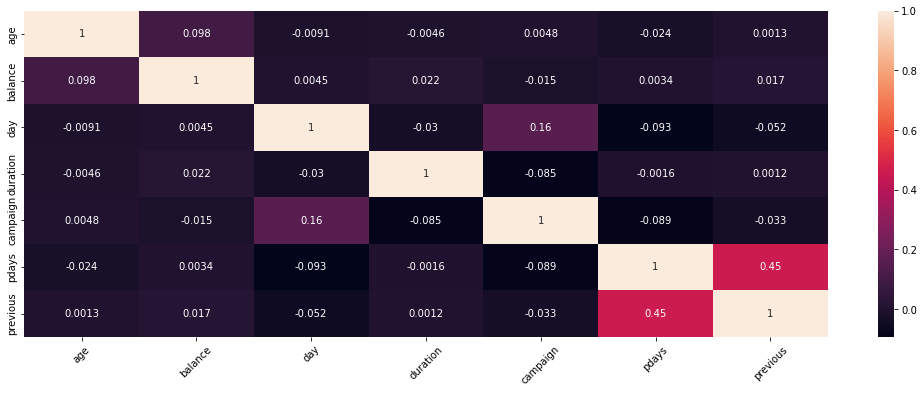

In [14]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(raw_data.corr(), annot=True);
plt.xticks(rotation=45)

### Lets analyze the continuous values by creating histograms to understand the distribution of the numerical features

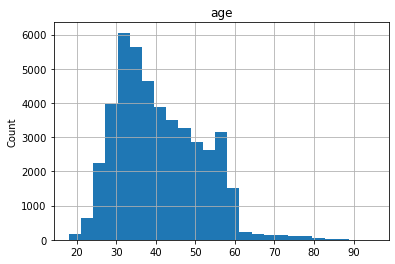

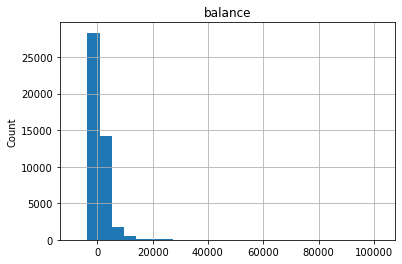

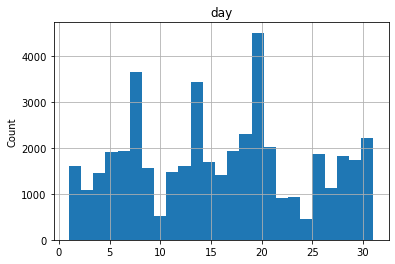

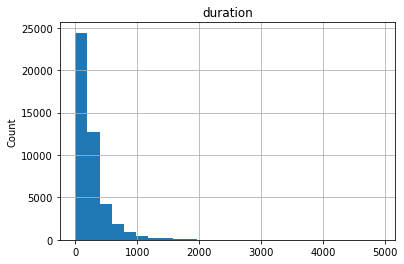

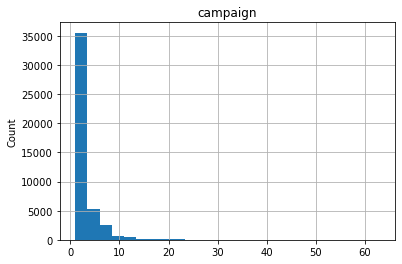

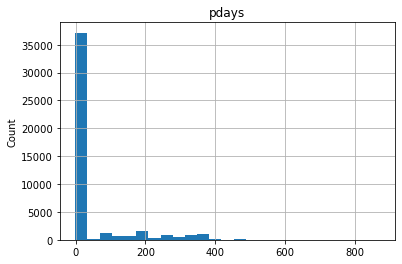

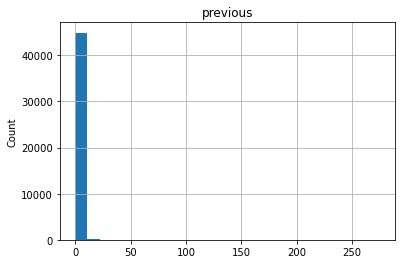

In [15]:
for feature in continuous_feature:
    data=raw_data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

## Log transformation
+ We will be using logarithmic transformation

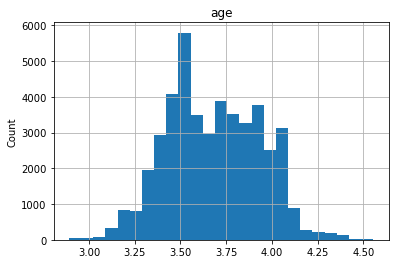

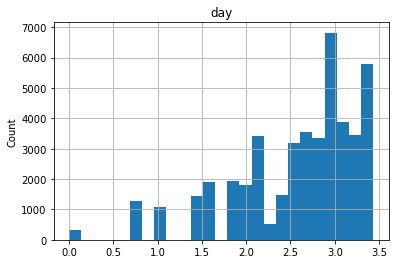

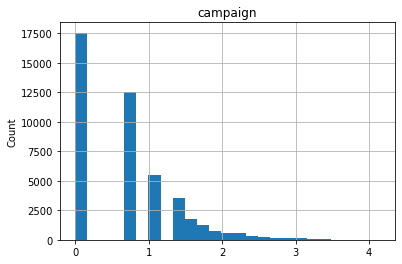

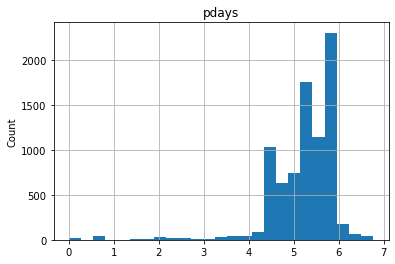

In [16]:
for feature in continuous_feature:
    data=raw_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

### 3.1 Outliers Detection<a class="anchor" id="3.1"></a>

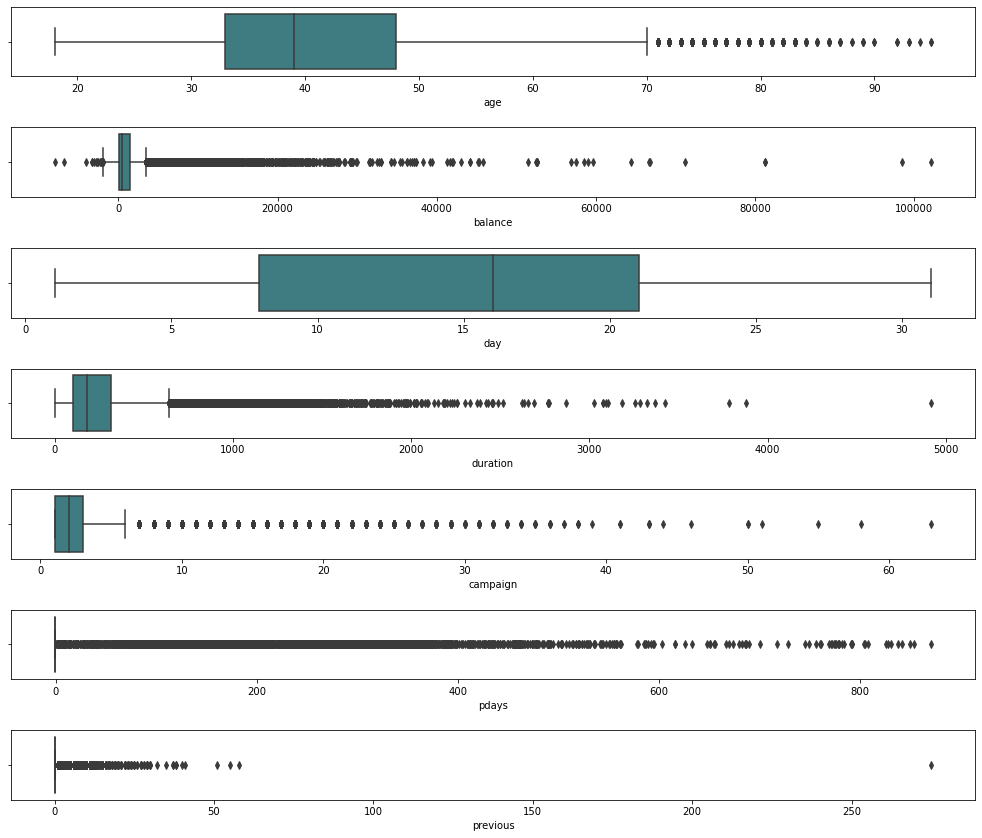

In [17]:
ot=raw_data.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

#### After Log-Transformation

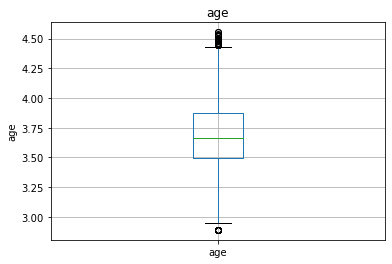

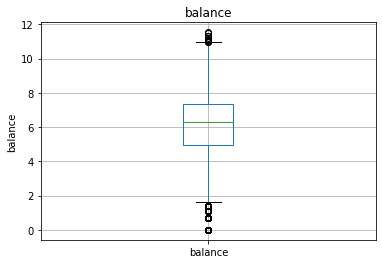

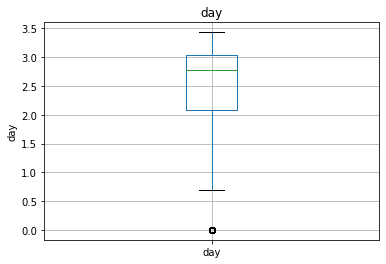

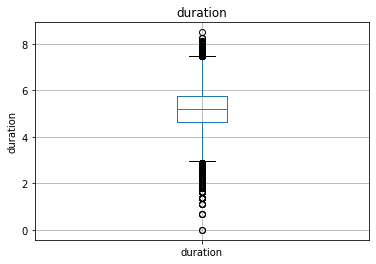

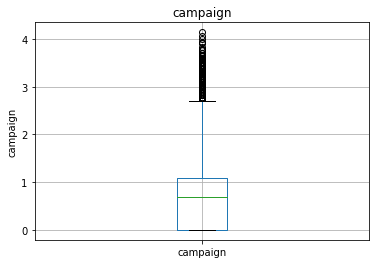

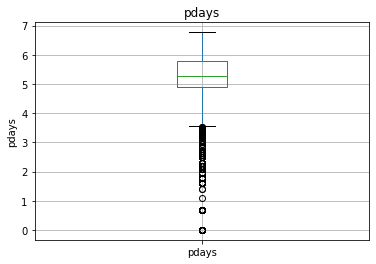

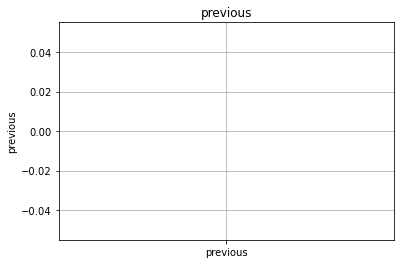

In [18]:
for feature in continuous_feature:
    data=raw_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### 3.2 Visualize the distribution of 'age' and 'balance'<a class="anchor" id="3.2"></a>

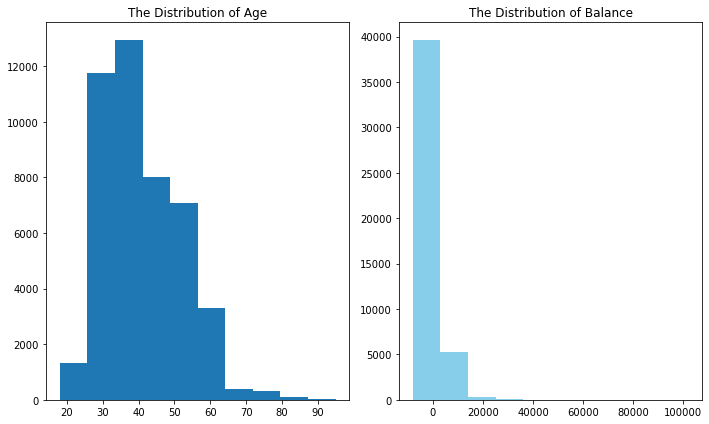

In [19]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(raw_data['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(raw_data['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

In [20]:
raw_data[['age','balance']].describe()

,age,balance
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


### 3.3 Visualize the relationship between 'duration' & 'campaign' <a class="anchor" id="3.3"></a>

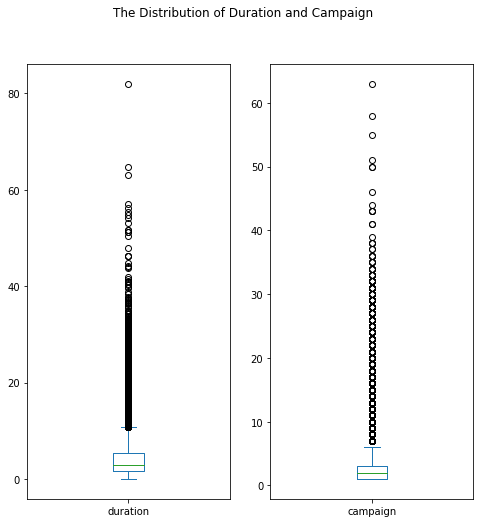

In [21]:
# Change the unit of 'duration' from seconds to minutes
df1 = raw_data.copy()
df1['duration'] = df1['duration'].apply(lambda n:n/60).round(2)
df1[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

In [22]:
df1[['duration','campaign']].describe()

,duration,campaign
count,45211.000000,45211.000000
mean,4.302729,2.763841
std,4.292132,3.098021
min,0.000000,1.000000
25%,1.720000,1.000000
50%,3.000000,2.000000
75%,5.320000,3.000000
max,81.970000,63.000000


### 3.4 Now let's look how numerical columns affect term deposit subscription. <a class="anchor" id="3.4"></a>

In [23]:
#balance and deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (raw_data[raw_data['y'] == 'yes'][['y','balance']].describe())['balance']
b_df['balance_no'] = (raw_data[raw_data['y'] == 'no'][['y','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


<AxesSubplot:title={'center':'Balance and deposit statistics'}>

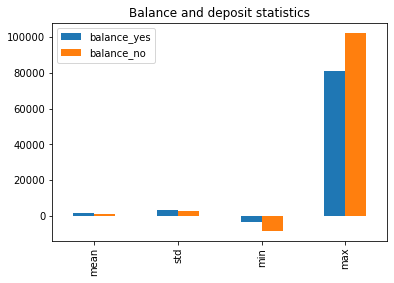

In [24]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

In [25]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (raw_data[raw_data['y'] == 'yes'][['y','age']].describe())['age']
a_df['age_no'] = (raw_data[raw_data['y'] == 'no'][['y','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


<AxesSubplot:title={'center':'Age and deposit statistics'}>

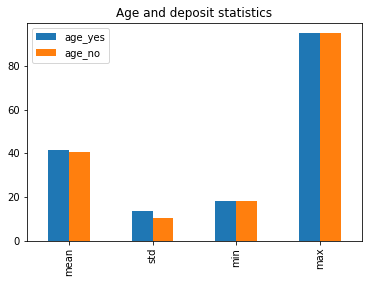

In [26]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [27]:
#number of contacts performed during this campaign ('campaign') and deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = (raw_data[raw_data['y'] == 'yes'][['y','campaign']].describe())['campaign']
c_df['campaign_no'] = (raw_data[raw_data['y'] == 'no'][['y','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<AxesSubplot:title={'center':'Number of contacts performed during this campaign and deposit statistics'}>

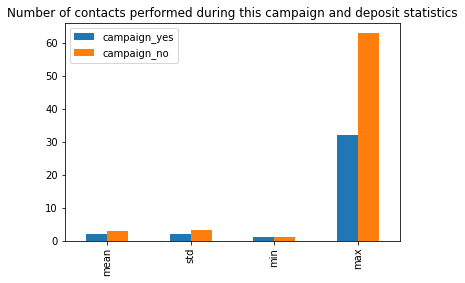

In [28]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

In [29]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (raw_data[raw_data['y'] == 'yes'][['y','previous']].describe())['previous']
p_df['previous_no'] = (raw_data[raw_data['y'] == 'no'][['y','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.000000,39922.000000
mean,1.170354,0.502154
std,2.553272,2.256771
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,58.000000,275.000000


<AxesSubplot:title={'center':'Number of contacts performed during previous campaign and deposit statistics'}>

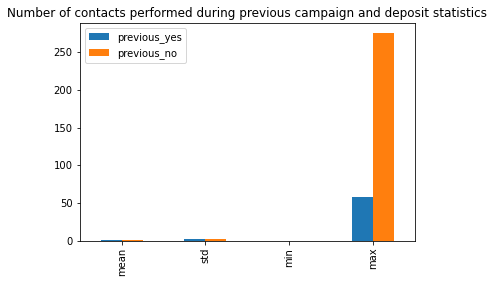

In [30]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

### Categorical Variables

In [31]:
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
raw_data[categorical_features].head()

Number of Categorical Features: 10 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [32]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(raw_data[feature].unique()),feature))

12 number of unique categories in feature named job
3 number of unique categories in feature named marital
4 number of unique categories in feature named education
2 number of unique categories in feature named default
2 number of unique categories in feature named housing
2 number of unique categories in feature named loan
3 number of unique categories in feature named contact
12 number of unique categories in feature named month
4 number of unique categories in feature named poutcome
2 number of unique categories in feature named y


In [39]:
# Decide which categorical variables you want to use in model
for feature in raw_data.columns:
    if raw_data[col_name].dtypes == 'object':# in pandas it is object
        unique_cat = len(raw_data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))
        print(raw_data[col_name].value_counts())
        print()

NameError: name 'col_name' is not defined

In [ ]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = raw_data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

### 3.5 Bar plot for all categorical variables in the dataset<a class="anchor" id="3.5"></a>

In [ ]:
pal = sns.color_palette('rainbow')
sns.countplot(x='job', data=raw_data, palette = pal, 
              order=raw_data['job'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Jobs')

In [ ]:
sns.countplot(x='marital', data=raw_data, palette = pal, 
              order=raw_data['marital'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Marital Status')

In [ ]:
sns.countplot(x='education', data=raw_data, palette = pal, 
              order=raw_data['education'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Education')

In [ ]:
sns.countplot(x='housing', data=raw_data, palette = pal, 
              order=raw_data['housing'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Housing')

In [ ]:
sns.countplot(x='loan', data=raw_data, palette = pal, 
              order=raw_data['loan'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Loan')

In [ ]:
countNotermdeposit = len(raw_data[raw_data.y == 'no'])
counthavetermdeposit = len(raw_data[raw_data.y == 'yes'])
print("Percentage of Customer doesn't have a term deposit: {:.2f}%".format((countNotermdeposit / (len(raw_data.y))*100)))
print("Percentage of Customer have a term deposit: {:.2f}%".format((counthavetermdeposit / (len(raw_data.y))*100)))

In [ ]:
raw_data.y.value_counts()

In [ ]:
sns.countplot(x='y', data=raw_data, palette = pal, 
              order=raw_data['y'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has subscribed a term deposit or not ')

## 4. Data Visualization<a class="anchor" id="4"></a>

#### Analyzing the relationship of categorical features with respect to the Target feature

#### Univariate Analysis

In [ ]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['job'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

In [ ]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=raw_data['job'], columns=raw_data['y']), annot=True, 
            fmt='g')

In [ ]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['marital'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

In [ ]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=raw_data['marital'], columns=raw_data['y']), annot=True, 
            fmt='g')

In [ ]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['education'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

In [ ]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=raw_data['education'], columns=raw_data['y']), annot=True, 
            fmt='g')

In [ ]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['contact'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

In [ ]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=raw_data['contact'], columns=raw_data['y']), annot=True, 
            fmt='g')

In [ ]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['poutcome'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['poutcome'].value_counts()

j_df.plot.bar(title = 'Type of possible outcome and deposit')

In [ ]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=raw_data['poutcome'], columns=raw_data['y']), annot=True, 
            fmt='g')

In [ ]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['loan'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['loan'].value_counts()

j_df.plot.bar(title = 'Loan and deposit')

In [ ]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=raw_data['loan'], columns=raw_data['y']), annot=True, 
            fmt='g')

### 4.1 Analyzing Relation by plotting Continuous features with the Target Feature<a class="anchor" id="4.1"></a>

In [ ]:
pd.crosstab(raw_data.age,raw_data.y).plot(kind="bar",figsize=(20,6))
plt.title('Term Deposit accepted Frequency for Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.scatter(x=raw_data.age[raw_data.y== 'yes'], y=raw_data.balance[(raw_data.y== 'yes')], c="red")
plt.scatter(x=raw_data.age[raw_data.y== 'no'], y=raw_data.balance[(raw_data.y== 'no')])
plt.legend(["Term Deposit", "NO Term Deposit"])
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

### 4.2 Visualize the subscription and contact rate by age <a class="anchor" id="4.2"></a>

In [ ]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['y'],raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age['% Refusal'] = count_age_response_pct['no']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Contacted','% Subscription','% Refusal']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('yellow','green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

In [ ]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['y'],raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')

# label the bar
for rec, label in zip(plot_age.patches,
                      age['% Subscription'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

### 4.3 Visualize the subscription rate by balance level<a class="anchor" id="4.3"></a>

In [ ]:
lst = [raw_data]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'
    
count_balance_response_pct = pd.crosstab(raw_data['y'],raw_data['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(raw_data['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('green','red'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

### 4.4 Visualize the subscription rate by age and balance<a class="anchor" id="4.4"></a>

In [ ]:
# Step 1: Change column name: 'y' to 'response'
df  =raw_data.copy()
df.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(data, new_column, old_column):
    data[new_column] = data[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return data[new_column].value_counts()

convert(df, "response_binary", "response")

In [ ]:
age_balance1 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

### 4.5 Visualize the subscription rate by job<a class="anchor" id="4.5"></a>

In [ ]:
count_job_response_pct = pd.crosstab(df['response'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

In [ ]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

In [ ]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

### 4.6 Visualize the relationship between 'duration' & 'campaign': with response result<a class="anchor" id="4.6"></a>

In [ ]:
dur_cam = sns.lmplot(x='duration', y='campaign',data = df1,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=10, linewidth=2, color="k", linestyle='--')
plt.axvline(x=35, linewidth=2, color="k", linestyle='--' )
plt.annotate("Higher subscription rate when \n number of calls <10 \n and duration <35",xytext = (40,15),
             arrowprops=dict(color = 'k', width=1),xy=(35,10))
plt.show()

### 4.7 Visualize the subscription and contact rate by month<a class="anchor" id="4.7"></a>

In [ ]:
# Step 4: Change 'month' from words to numbers for easier analysis
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['response'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

#### Visualize the subscription rate by Education

In [ ]:
df.education.unique()

In [ ]:
count_education_response_pct = pd.crosstab(df['response'],df['education']).apply(lambda x: x/x.sum() * 100)
count_education_response_pct = count_education_response_pct.transpose()
count_education_response_pct

In [ ]:
plot_education = count_education_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (14,6))
                                                                               
plt.title('Subscription Rate by Education')
plt.xlabel('Subscription Rate')
plt.ylabel('Education Category')

# Label each bar
for rec, label in zip(plot_education.patches,
                      count_education_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_education.text(rec.get_width()+0.5, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom',
                fontsize = 'large')

## 5. Clean the dataset <a class="anchor" id="5"></a>
#### Deal with missing data 
There is no missing value in this dataset. Nevertheless, there are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

In [ ]:
cols = [col for col in raw_data.columns]
col_missing = []
for col in cols:
    if 'unknown' in raw_data[col].values:
        col_missing.append(col)
        
print("Columns with Unknown Values -",col_missing) 

In [ ]:
print("Unknown values count")
for col in col_missing:
    print(col,"-",raw_data[raw_data[col].str.contains('unknown')][col].count())

In [ ]:
print(raw_data.groupby(raw_data['job'])['job'].count(),"\n")

In [ ]:
print(raw_data.groupby(raw_data['education'])['education'].count(),"\n")

In [ ]:
print(raw_data.groupby(raw_data['poutcome'])['poutcome'].count(),"\n")

In [ ]:
print(raw_data.groupby(raw_data['contact'])['contact'].count(),"\n")

### 5.1 Creating and transforming data<a class="anchor" id="5.1"></a>

In [ ]:
df = raw_data.copy()

In [ ]:
# Step 2: Replace 'unknown' in job and education with 'other'
df[['job','education','contact','poutcome']] = df[['job','education','contact','poutcome']].replace(['unknown'],'other')

In [ ]:
df.poutcome.value_counts()

In [ ]:
# Custom Binary Encoding of Binary o/p variables 
df['default'] = np.where(df['default'].str.contains("yes"), 1, 0)
df['housing'] = np.where(df['housing'].str.contains("yes"), 1, 0)
df['loan'] = np.where(df['loan'].str.contains("yes"), 1, 0)
df['y'] = np.where(df['y'].str.contains("yes"), 1, 0)
df

### Making dataframe of all the categorical columns to make dummy variables for all these categorical variables.

In [ ]:
# One-Hot Encoding of categrical variables
# df=pd.get_dummies(df,columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])
# To see all columns
# pd.set_option("display.max.columns", None)
# df

In [ ]:
categorical = df.select_dtypes(include=['object'])
categorical.head()

In [ ]:
categorical.poutcome.value_counts()

In [ ]:
# dummy variables of all categorical columns
dummies = pd.get_dummies(categorical)
dummies.head()

In [ ]:
# concatination of two dataframes 'bank' and 'dummies'
df = pd.concat([df,dummies],axis=1)
df.drop(columns=categorical.columns,axis=1,inplace=True)

In [ ]:
# To see all columns
pd.set_option("display.max.columns", None)
df

In [ ]:
df.columns

In [ ]:
df[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success']]=df[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success']].astype('int64')
df.info()

In [ ]:
# Label Encoding Technique

In [ ]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df=df.replace(order)

In [ ]:
# Label Encoding of categrical variables
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
raw_data['job']= label_encoder.fit_transform(raw_data['job'])
raw_data['marital']= label_encoder.fit_transform(raw_data['marital'])
raw_data['education']= label_encoder.fit_transform(raw_data['education'])
raw_data['contact']= label_encoder.fit_transform(raw_data['contact'])
raw_data['poutcome']= label_encoder.fit_transform(raw_data['poutcome'])

raw_data.head(10)

In [ ]:
raw_data.month.unique()

In [ ]:
# Change the unit of 'duration' from seconds to minutes
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)
df.head()

### Applying Standard Scaler
+ For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
+ x_scaled = x – mean/std_dev
+ However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

df_standard_scaled = df.copy()
column_name= ['balance','age','duration']
features = df_standard_scaled[column_name]
rest = [columns for columns in df.columns if columns not in column_name]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = column_name)
df_standard_scaled[rest] = df[rest]
df_standard_scaled.head()

### 6. Feature Selection<a class="anchor" id="6"></a>
####  Recursive Feature Elimination
##### For feature selection, we wil use the Recursive Feature Elimination (RFE).

#### We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [ ]:
x = df_standard_scaled.drop('y', 1)
y = df_standard_scaled['y']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

In [ ]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE

In [ ]:
# Model to Test
classifier = LogisticRegression()

# Select Best X Features
rfe = RFE(classifier,n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [ ]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
x_train.columns[rfe.support_]

In [ ]:
x_train.columns[~rfe.support_]

In [ ]:
import statsmodels.api as sm

In [ ]:
col1 = x_train.columns[rfe.support_]
x_train_sm = sm.add_constant(x_train[col1])
logm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

#### We can see that none of the variables here have high p-values i.e. greater than 0.05. So there is do not need to drop any of the features before moving ahead

In [ ]:
# predicted values of the train dataset giving the probability
x_test_sm = sm.add_constant(x_test[col1])
y_test_pred = res.predict(x_test_sm)
y_test_pred[:10]

In [ ]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

#### Creating the dataframe with the actual subscription flag and the predicted probabilities

In [ ]:
y_test_pred_final = pd.DataFrame({'Sub':y_test.values,'Sub_prob':y_test_pred})
y_test_pred_final['Cust_id'] = y_test.index
y_test_pred_final.head(10)

#### Creating new column 'predict' with 1 if Sub_prob > 0.5 else 0

In [ ]:
y_test_pred_final['predict'] = y_test_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

In [ ]:
# creating confusion matrix for the following prediction
confusion = cm(y_test_pred_final.Sub, y_test_pred_final.predict)
confusion

In [ ]:
print(ac(y_test_pred_final.Sub, y_test_pred_final.predict))

#### The accuracy of the model is approximately 90% which is a really good model for prediction

In [ ]:
# print the classification report
print('After Feature Selection','\n',report(y_test_pred_final.Sub, y_test_pred_final.predict))

In [ ]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final.Sub, y_test_pred_final.Sub_prob,drop_intermediate=False)

In [ ]:
draw_roc(y_test_pred_final.Sub, y_test_pred_final.Sub_prob)

In [ ]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = x_train[x_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) 

### 7. Machine Learning: Classification <a class="anchor" id="7"></a>

### 7.1 Sklearn Logistic Regression and Accuracy<a class="anchor" id="7.1"></a>

In [ ]:
accuracy = {}

feature_selection = LogisticRegression()
feature_selection.fit(x_train[x_train.columns[rfe.support_]], y_train)
ACC = feature_selection.score(x_test[x_test.columns[rfe.support_]],y_test)*100

accuracy['Logistic Regression after Feature Selection'] = ACC
print("Test Accuracy {:.2f}%".format(ACC))

#### Accuracy on the Feature Selected features have 89.89% Accuracy which is still better as we have eliminated some of the features

In [ ]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

#### Accuracy on all the features is approximately same as we have got for the feature selection features

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

#Predictions
y_predict = lr.predict(x_test)
y_pred = feature_selection.predict(x_test[x_test.columns[rfe.support_]])

print('Without Feature Selection','\n', cm(y_test, y_predict))
print('After Feature Selection','\n', cm(y_test, y_pred))

In [ ]:
# print the classification report

print('Without Feature Selection','\n',report(y_test, y_predict))
print('After Feature Selection','\n',report(y_test, y_pred))

In [ ]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y_t,feature_selection.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

In [ ]:
# As accuracy = 0.8933, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
lr.predict_proba(x)[:,1] 

### Compare the train-set and test-set accuracy 
Now, I will compare the train-set and test-set accuracy to check for overfitting.

#### Check for overfitting and underfitting 


In [ ]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(lr.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(lr.score(x_test, y_test)*100))

The training-set accuracy score is 89.71% while the test-set accuracy to be 89.22% These two values are quite comparable. So, there is no question of overfitting

### Compare model accuracy with null accuracy 
So, the model accuracy is 89.71%. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [ ]:
# check class distribution in test set

y_test.value_counts()

calculate the percentage of ones
because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones

In [ ]:
print("Mean of 1's",y_test.mean(),"\n Percentage of 1's",np.round(y_test.mean(),2)*100,'%')

In [ ]:
# calculate the percentage of zeros
print("Mean of 0's",1-y_test.mean(),"\n Percentage of 0's",np.round(1-y_test.mean(),2)*100,'%')

In [ ]:
# calculate null accuracy 
y_test.value_counts().head(1) / len(y_test)

<b> Conclusion:

+ Classification accuracy is the easiest classification metric to understand
    + But, it does not tell you the underlying distribution of response values
+ We examine by calculating the null accuracy And, it does not tell you what "types" of errors your classifier is making

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

#Predictions
y_predict = lr.predict(x_test)

print(cm(y_test, y_predict))

In [ ]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y_test, y_predict)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:
y_predict = lr.predict(x)

print(cm(y, y_predict))

In [ ]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y, y_predict)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:
# save confusion matrix and slice into four pieces
confusion = cm(y_test, y_predict)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

### Metrics computed from a confusion matrix
Classification Accuracy: Overall, how often is the classifier correct?

In [ ]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(ac(y_test, y_predict))

### Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - ac(y_test, y_predict))

<b>Recall</b>: When the actual value is positive, how often is the prediction correct?

+ Something we want to maximize
+ How "sensitive" is the classifier to detecting positive instances?
+ Also known as "True Positive Rate" or "Sensitivity"
+ TP / all positive
    + all positive = TP + FN

In [ ]:
recall = TP / float(FN + TP)

print(recall)
print(recall_score(y_test, y_predict))

<b>Specificity</b>: When the actual value is negative, how often is the prediction correct?

+ Something we want to maximize
+ How "specific" (or "selective") is the classifier in predicting positive instances?
+ TN / all negative
    + all negative = TN + FP

In [ ]:
specificity = TN / (TN + FP)

print(specificity)

Our classifier

+ Highly specific
+ Not sensitive

<b>False Positive Rate</b>: When the actual value is negative, how often is the prediction incorrect?

In [ ]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

<b>Precision</b>: When a positive value is predicted, how often is the prediction correct?

+ How "precise" is the classifier when predicting positive instances?

In [ ]:
precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, y_predict))

<b>f1-score 
    
+ f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [ ]:
f1_score = 2*((precision_score(y_test, y_predict) * recall_score(y_test, y_predict))/(precision_score(y_test, y_predict) + recall_score(y_test, y_predict)))
f1_score

### The threshold level 

In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = lr.predict_proba(x_test)[0:10]

y_pred_prob

In [ ]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = lr.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

<b>Observations
+ We can see that the above histogram is highly positive skewed.
+ The first column tell us that there are approximately 6000 observations with probability between 0.0 and 0.1.
+ There are small number of observations with probability > 0.5.
+ So, these small number of observations predict that there will be a Subscription.
+ Majority of observations predict that there will be no Subscription.

### 7.3 Lower the Threshold<a class="anchor" id="7.3"></a>

In [ ]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = lr.predict_proba(x_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, threshold=i/10)
       
    cm1 = cm(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
               'Accuracy score: ', (ac(y_test, y_pred2)), '\n\n',
           
               'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
               'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
                '====================================================', '\n\n')

### 7.4 ROC - AUC <a class="anchor" id="7.4"></a>
#### ROC Curve
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

In [ ]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,lr.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,y_predict)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC curve for Subscription classifier')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC-ROC Score:',auc)

### ROC AUC Score
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [ ]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_predict)
print(curve)

<b>Comments
+ ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

+ ROC AUC of our model approaches towards 0.5. So, we can conclude that our classifier doesn't do a good job in predicting whether it will subscription or not.

### 7.5 Finding the Optimcal Threshold Value<a class="anchor" id="7.5"></a>

In [ ]:
final_prediction = lr.predict_proba(x)[:,1]
fpr,tpr,thresholds=roc_curve(y,lr.predict_proba(x)[:,1])

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(ac(y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

If this was a use case for balaced dataset we would have gone with accuracy to select the optimal threshold value, otherwise it depends when data is imbalanced sometimes recall is more important than precision and sometimes the other way around and sometimes both are more important then we will go with F1-Score to select the optimal threshold value.

In [ ]:
final_prediction = lr.predict_proba(x)[:,1]
fpr,tpr,thresholds=roc_curve(y,lr.predict_proba(x)[:,1])

f1_score_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    f1_score_ls.append(f1_score(y, y_pred))
    
f1_score_ls = pd.concat([pd.Series(thresholds), pd.Series(f1_score_ls)],axis=1)
f1_score_ls.columns = ['thresholds', 'f1_score']
f1_score_ls.sort_values(by='f1_score', ascending=False, inplace=True)
f1_score_ls.head()

### 7.6 Classification Report<a class="anchor" id="7.6"></a>

In [ ]:
# print the classification report

print(report(y_test, y_predict))

### 7.7 Predictions<a class="anchor" id="7.7"></a>

In [ ]:
#Predictions
y_pred = lr.predict(x)

# Creating a datframe to with actual value and predicted value

predict = pd.DataFrame({'Actual':y,'Predicted':y_pred})
predict

### 8. Synthetic Minority Oversampling Technique <a class="anchor" id="8"></a>
A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short

In [ ]:
# import imblearn library and resample the original data using SMOTE technique
from sklearn.neighbors import DistanceMetric
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(x_train, y_train)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_smote))

In [ ]:
# training a Logistic Regression model on SMOTE data

lr_smote = LogisticRegression()
lr_smote.fit(X_smote, y_smote)

In [ ]:
accuracies = {}

acc = lr_smote.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

In [ ]:
# plot confusion matrix to describe the performance of classifier.
#Predictions
y_predict_smote = lr_smote.predict(x_test)

cm_df_smote=cm(y_test, y_predict_smote)
class_label = ["No", "Yes"]
df_cm_smote = pd.DataFrame(cm_df_smote, index = class_label, columns = class_label)
sns.heatmap(df_cm_smote, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:
# print the classification report

print(report(y_test, y_predict_smote))

In [ ]:
# let's compute the AUC curve for the model we developed on SMOTE data

from plot_metric.functions import BinaryClassification

bc = BinaryClassification(y_test, lr_smote.predict_proba(x_test)[:,1],  labels=[0, 1])
plt.figure(figsize=(16, 8))
bc.plot_roc_curve()
plt.show()

In [ ]:
# let's use another probability threshold so that we can get to the elbow position in the above curve

bc = BinaryClassification(y_test, lr_smote.predict_proba(x_test)[:,1], threshold=0.4, labels=[0, 1])
plt.figure(figsize=(16, 8))
bc.plot_roc_curve()
plt.show()

In [ ]:
# compute the probabilites of test observations using rf_smote model

y_pred_proba = lr_smote.predict_proba(x_test)[:,1]
# compare these probabilities against the probability threshold of 6% rather than the default threshold of 50%

y_pred_labels = (y_pred_proba >= 0.4)
# plot the confusion matrix

sns.heatmap(cm(y_test, y_pred_labels), annot=True, fmt='0.0f')

In [ ]:
# print the classification report

print(report(y_test, y_pred_labels))

## 9. Conclusion <a class="anchor" id="9"></a>
<b>Key outcomes of the analysis are the recommendations for future marketing campaigns:</b>

+ The customer's account balance has a huge influence on the campaign's outcome. People with account balance above 1490$ $ $  are more likely to subscribe for term deposit, so future address those customers.


+ The customer's age affects campaign outcome as well. Future campains should concentrate on customers from age categories below 30 years old and above 50 years old.


+ Number of contacts with the customer during the campaign is also very important. The number of contacts with the customer shouldn't exceed 4.